# Question 1

# 1. Importing the necessary libraries

In [75]:
import time
import numpy as np
import matplotlib.pyplot as plt

# 2. Defining the gradient_descent() function as given in the question

In [76]:
def gradient_descent(gradient, init_, learn_rate, n_iter=50, tol=1e-06):
    x = init_
    for _ in range(n_iter):
        delta = -learn_rate * gradient(x)
        if (np.all(np.abs(delta)) <= tol):
            break
        x += delta
    return round(x*1000)/1000

## (a) Find minima for (i) $x^2 + 3x + 4$

To find the minima for the given function using gradient descent function (given in the question), we will have to first calculate the gradient. Then we will define a function to calculate this gradient using python.

$$
\begin{align}
\nabla f &= \frac {\partial f}{\partial x} \\
\nabla f &= 2x + 3
\end{align}
$$

In [77]:
def gradient_i(x):
    '''
    This function calculates and returns the gradient of function above
    '''
    return 2*x + 3

def function_i(x):
    '''
    This function returns the value of above function for an input x
    '''
    return x**2 + 3*x + 4

min_x = gradient_descent(gradient_i, init_=50, learn_rate=0.2, n_iter=50, tol=1e-06)
function_minima = function_i(min_x)

print('The minima of the function x^2 + 3x + 4 occurs at x =', min_x,
      'and the minimum value of the function at this x is =', function_minima)

The minima of the function x^2 + 3x + 4 occurs at x = -1.5 and the minimum value of the function at this x is = 1.75


## Plot function graph and the calculated point of minima

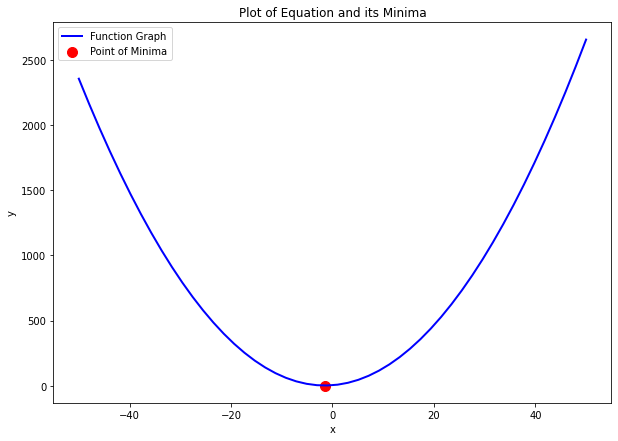

In [78]:
# Define figure-size, labels, and figure-title
plt.figure(figsize=(10, 7))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Equation and its Minima')
# Plot the point of minima
plt.scatter(min_x, function_i(min_x), color='r', s=100)

# Plot optimal line Y = aX + b for some random a and b
x = np.linspace(-50, 50)
plt.plot(x, function_i(x), color='b', linewidth=2)
plt.legend(["Function Graph", "Point of Minima"], loc ="upper left")
plt.show()

## (a) Find minima for (ii) $x^4 - 3x^2 + 2x$

To find the minima for the given function using gradient descent function (given in the question), we will have to first calculate the gradient. Then we will define a function to calculate this gradient using python.

$$
\begin{align}
\nabla f &= \frac {\partial f}{\partial x} \\
\nabla f &= 4x^3 - 6x + 2
\end{align}
$$

In [79]:
def gradient_ii(x):
    '''
    This function calculates and returns the gradient of function above
    '''
    return 4*(x**3) - 6*x + 2

def function_ii(x):
    '''
    This function returns the value of above function for an input x
    '''
    return x**4 - 3*(x**2) + 2*x

min_x = gradient_descent(gradient_ii, init_=-0.5, learn_rate=0.002, n_iter=500, tol=1e-06)
function_minima = function_ii(min_x)

print('The minima of the function x^2 + 3x + 4 occurs at x =', min_x,
      'and the minimum value of the function at this x is =', function_minima)

The minima of the function x^2 + 3x + 4 occurs at x = -1.366 and the minimum value of the function at this x is = -4.848076206064


## Plot function graph and the calculated point of minima

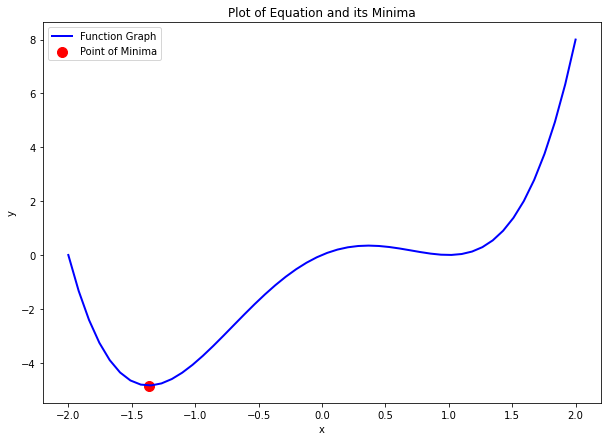

In [80]:
# Define figure-size, labels, and figure-title
plt.figure(figsize=(10, 7))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Equation and its Minima')
# Plot the point of minima
plt.scatter(min_x, function_ii(min_x), color='r', s=100)

# Plot optimal line Y = aX + b for some random a and b
x = np.linspace(-2, 2)
plt.plot(x, function_ii(x), color='b', linewidth=2)
plt.legend(["Function Graph", "Point of Minima"], loc ="upper left")
plt.show()

## (b) Write a gradient function to calculate gradients for a linear regression $y = ax + b$

The average least squared loss function for linear regression can be written as: $L(a, b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - ax_i - b)^2 $

The gradient of $L(a, b)$ can be calculated as follows:

Gradient with respect to $a$:

$$
\begin{align*}
\nabla L(a, b) &= \frac {\partial L}{\partial a} \\
\nabla L(a, b) &= \frac{1}{N} \sum_{i=1}^{N} 2(y_i - ax_i - b) \frac {\partial (y_i - ax_i - b)}{\partial a} \\
&= \frac{-2}{N} \sum_{i=1}^{N} (y_i - ax_i - b)x_i
\end{align*}
$$

Gradient with respect to $b$:

$$
\begin{align*}
\nabla L(a, b) &= \frac {\partial L}{\partial b} \\
\nabla L(a, b) &= \frac{1}{N} \sum_{i=1}^{N} 2(y_i - ax_i - b) \frac {\partial (y_i - ax_i - b)}{\partial b} \\
&= \frac{2}{N} \sum_{i=1}^{N} (y_i - ax_i - b)
\end{align*}
$$

In a more compact way, the gradient can be written as $g = \frac{-2}{N} (y-Xw)X $

In [81]:
def gradient_linear_regression(X, y, w):
    '''
    This function returns the gradient of least squared loss function for the linear regression.
    gradient = - (2 / N) * (y - Xw)x
    The function assumes that 1's have been appended to the first dimension in each data point in X.
    Ex. If X = [0.1, 0.2, 0.3] then the input for this function should be
    X = [[1, 0.1], [1, 0.2], [1, 0.3]]
    '''
    # The below line appends an extra dimension of ones to the data samples
    # I have commented it, it was written just for completion.
    # X = np.c_[np.ones(X.shape[0]), X]
    
    # calculate and return the gradient
    # Note: X.shape[0] will give the number of datapoints (N)
    return - 2 * np.dot(y - np.dot(X, w), X) / X.shape[0]

## (c) Generate artificial data for this regression according to the following protocol and use gradient descent to find the optimal parameters relating X with y (for $y = aX + b$).

    np.random.seed(0)
    X = 2.5 * np.random.randn(100) + 1.5  # Array of values with mean 1.5 and stddev 2.5
    res = 1.5 * np.random.randn(100)  # Generate residual terms
    y = 2 + 0.3 * X + res  # Actual values of y

In [82]:
# Based on the above instructions, define X and y
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5  # Array of values with mean 1.5 and stddev 2.5
res = 1.5 * np.random.randn(10000)  # Generate residual terms
y = 2 + 0.3 * X + res  # Actual values of y

# The below line appends an extra dimension of ones to the data samples
X = np.c_[np.ones(X.shape[0]), X]

In [83]:
def avg_least_squared_loss(X, y, w):
    '''
    This function calculates and returns the average least squared loss
    Input: Data X, outputs y, and parameters w
    Output: Value of avg least squared loss
    '''
    return np.sum(np.square(y - np.dot(X, w))) / X.shape[0]

In [84]:
# Modify the gradient_descent function for our linear regression problem
def gradient_descent_linear_regression(X, y, gradient, init_, learn_rate, n_iter=50, tol=1e-06):
    
    # Create an empty list to store loss over each iteration
    loss = list()
    
    # assign initial value to w
    w = np.random.rand(2)
    
    # run gradient descent for n_iter iterations
    for i in range(n_iter):
        
        # calculate delta = -learn_rate * gradient of the batch
        delta = -learn_rate * gradient(X, y, w)
        
        # break if delta is close to 0
        if (np.all(np.abs(delta)) <= tol):
            break
        
        # update parameters
        w += delta

        # calculate loss for this iteration
        iter_loss = avg_least_squared_loss(X, y, w)
        
        # apppend the loss to our list
        loss.append(iter_loss)
        
        # print the result of every 100th iteration
        if(i == 0 or (i+1)%100 == 0):
            print(f'Iteration {i+1}/{n_iter}', f'Loss {iter_loss:.6f}')
            
    # Plot cost
    plt.figure(figsize=(10, 7))
    plt.grid(True)
    plt.title('Avg Least Squared Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.plot(loss, linewidth=2, color='b')
    plt.show()

    # return the optimal w, as well the loss array (it stores loss on each iteration)
    return w, loss

Iteration 1/5000 Loss 3.712573
Iteration 100/5000 Loss 3.338841
Iteration 200/5000 Loss 3.058970
Iteration 300/5000 Loss 2.849120
Iteration 400/5000 Loss 2.691683
Iteration 500/5000 Loss 2.573565
Iteration 600/5000 Loss 2.484945
Iteration 700/5000 Loss 2.418458
Iteration 800/5000 Loss 2.368575
Iteration 900/5000 Loss 2.331150
Iteration 1000/5000 Loss 2.303072
Iteration 1100/5000 Loss 2.282006
Iteration 1200/5000 Loss 2.266201
Iteration 1300/5000 Loss 2.254343
Iteration 1400/5000 Loss 2.245447
Iteration 1500/5000 Loss 2.238772
Iteration 1600/5000 Loss 2.233765
Iteration 1700/5000 Loss 2.230008
Iteration 1800/5000 Loss 2.227189
Iteration 1900/5000 Loss 2.225074
Iteration 2000/5000 Loss 2.223487
Iteration 2100/5000 Loss 2.222297
Iteration 2200/5000 Loss 2.221404
Iteration 2300/5000 Loss 2.220734
Iteration 2400/5000 Loss 2.220231
Iteration 2500/5000 Loss 2.219854
Iteration 2600/5000 Loss 2.219571
Iteration 2700/5000 Loss 2.219359
Iteration 2800/5000 Loss 2.219200
Iteration 2900/5000 Loss 2

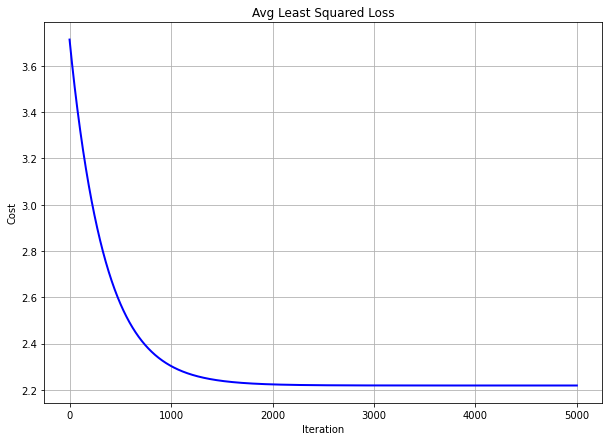

The optimal parameters (a and b) for our problem are:
 a = 0.29552705540877877 b = 2.022213963693806
The time taken is 2.42 seconds


In [85]:
# Initialize w (parameters a and b) randomly
np.random.seed(0)
init_w = np.random.rand(2)

# Run gradient descent
tic = time.time()
optimal_w, gd_loss = gradient_descent_linear_regression(X, y, gradient_linear_regression, init_w,
                                               learn_rate=0.001, n_iter=5000, tol=1e-06)
toc = time.time()
# Report the results
print('The optimal parameters (a and b) for our problem are:\n',
      'a =', optimal_w[1], 'b =', optimal_w[0])
print('The time taken is', "{:.2f}".format(toc-tic), 'seconds')

## Plot datapoints and the optimal line

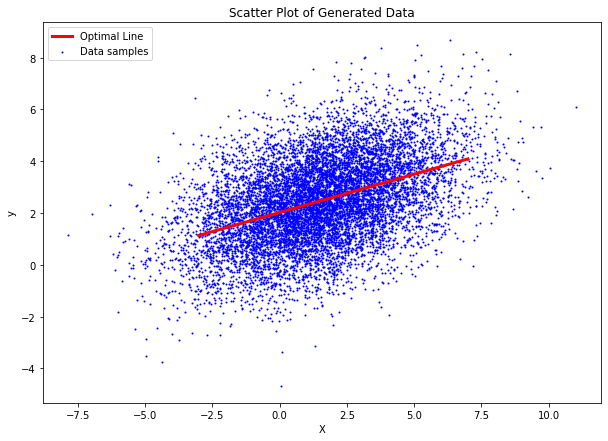

In [86]:
# Define figure-size, labels, and figure-title
plt.figure(figsize=(10, 7))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Generated Data')
# plt.ylim(1,8)
# plt.xlim(1,8)
# Scatter plot datapoints in X and y
plt.scatter(X[:, 1:], y, color='b', s=1)

# Plot optimal line Y = aX + b for some random a and b
x = np.linspace(-3, 7)
plt.plot(x, optimal_w[1]*x+optimal_w[0], color='r', linewidth=3)
plt.legend(["Optimal Line", "Data samples"], loc ="upper left")
plt.show()

## (d) Implement minibatch stochastic gradient descent

<br>

**Minibatch SGD Algorithm:**

    For each iteration:
        choose batch_size random indexes
        extract the data for these indexes
        calculate the gradient for the current mini-batch only
        update the parameters 'w' based on the above calculated gradient

In [87]:
def minibatch_sgd(X, y, gradient, init_, batch_size=50, learn_rate=0.01, n_iter=50, tol=1e-06):
    '''
    Implementation of minibatch SGD
    
    Input:
    X: Data samples
    y: Output (or labels)
    gradient: Function to calculate gradient of the loss function
    init_: Initialization of parameters
    learn_rate: learning rate to run our gradient descent algorithm
    batch_size: batch_size for running minibatch SGD
    n_iter: number of iterations
    tol: tolerance to stop iterations when the update becomes close to 0
    
    Output:
    Optimal parameters for the problem
    
    Logic:
    for each iteration:
        choose batch_size random indexes
        extract the data for these indexes
        calculate the gradient for the current mini-batch only
        update the parameters 'w' based on the above calculated gradient
    '''
    
    # Create an empty list to store loss over each iteration
    loss = list()
    
    # assign initial value to w
    w = init_
    
    # run gradient descent for epochs
    for i in range(n_iter):
        
        # select batch_size number of random indexes from the data
        batch_index = np.random.choice(X.shape[0], batch_size, replace=False)
        
        # extract the data for this batch
        X_batch = X[batch_index]
        y_batch = y[batch_index]

        # calculate delta = -learn_rate * gradient of the batch
        delta = -learn_rate * gradient(X_batch, y_batch, w)

        # break if delta is close to 0
        if (np.all(np.abs(delta)) <= tol):
            break

        # update parameters
        w += delta

        # calculate loss for this iteration
        iter_loss = avg_least_squared_loss(X_batch, y_batch, w)

        # apppend the loss to our list
        loss.append(iter_loss)

        # print the result of every 100th iteration
        if(i == 0 or (i+1)%100 == 0):
            print(f'Iteration {i+1}/{n_iter}', f'Loss {iter_loss:.6f}')
            
    # Plot cost
    plt.figure(figsize=(10, 7))
    plt.grid(True)
    plt.title('Avg Least Squared Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.plot(loss, linewidth=2, color='r')
    plt.show()

    # return the optimal w, as well the loss array (it stores loss on each iteration)
    return w, loss

Iteration 1/5000 Loss 3.781741
Iteration 100/5000 Loss 3.355455
Iteration 200/5000 Loss 3.334308
Iteration 300/5000 Loss 2.641023
Iteration 400/5000 Loss 2.814482
Iteration 500/5000 Loss 2.768287
Iteration 600/5000 Loss 2.976591
Iteration 700/5000 Loss 2.385366
Iteration 800/5000 Loss 2.689840
Iteration 900/5000 Loss 2.218819
Iteration 1000/5000 Loss 2.281823
Iteration 1100/5000 Loss 2.346667
Iteration 1200/5000 Loss 2.245387
Iteration 1300/5000 Loss 2.299213
Iteration 1400/5000 Loss 2.412014
Iteration 1500/5000 Loss 2.507988
Iteration 1600/5000 Loss 2.390134
Iteration 1700/5000 Loss 2.145438
Iteration 1800/5000 Loss 2.360531
Iteration 1900/5000 Loss 2.206387
Iteration 2000/5000 Loss 2.156337
Iteration 2100/5000 Loss 2.180641
Iteration 2200/5000 Loss 2.218927
Iteration 2300/5000 Loss 2.100117
Iteration 2400/5000 Loss 2.157959
Iteration 2500/5000 Loss 2.439423
Iteration 2600/5000 Loss 2.139184
Iteration 2700/5000 Loss 2.014136
Iteration 2800/5000 Loss 2.136759
Iteration 2900/5000 Loss 2

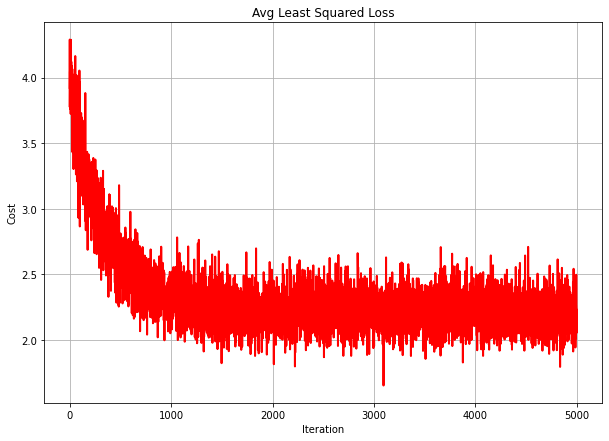

The optimal parameters (a and b) for our problem are:
 a = 0.2954478355260539 b = 2.0252883629338716
The time taken is 1.89 seconds


In [88]:
# Initialize w (parameters a and b) randomly
np.random.seed(0)
init_w = np.random.rand(2)

# define batch_size
batch_size = 512

# Run minibatch stochastic gradient descent
tic = time.time()
minibatch_sgd_optimal_w, minibatch_sgd_loss = minibatch_sgd(X, y, gradient_linear_regression,
                                                            init_w, batch_size=batch_size,
                                                            learn_rate=0.001, n_iter=5000,
                                                            tol=1e-06)
toc = time.time()

# Report the results
print('The optimal parameters (a and b) for our problem are:\n',
      'a =', minibatch_sgd_optimal_w[1], 'b =', minibatch_sgd_optimal_w[0])
print('The time taken is', "{:.2f}".format(toc-tic), 'seconds')

## Plot datapoints and the optimal line resulting from minibatch SGD

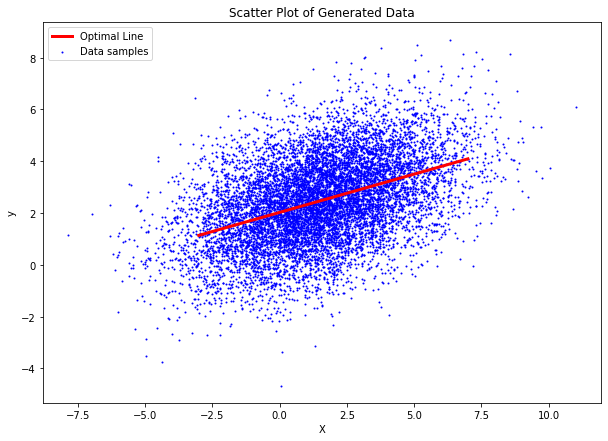

In [89]:
# Define figure-size, labels, and figure-title
plt.figure(figsize=(10, 7))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Generated Data')
# plt.ylim(1,8)
# plt.xlim(1,8)
# Scatter plot datapoints in X and y
plt.scatter(X[:, 1:], y, color='b', s=1)

# Plot optimal line Y = aX + b for some random a and b
x = np.linspace(-3, 7)
plt.plot(x, minibatch_sgd_optimal_w[1]*x+minibatch_sgd_optimal_w[0], color='r', linewidth=3)
plt.legend(["Optimal Line", "Data samples"], loc ="upper left")
plt.show()

### Compare the graph of values of loss in gradient descent and minibatch stochastic gradient descent

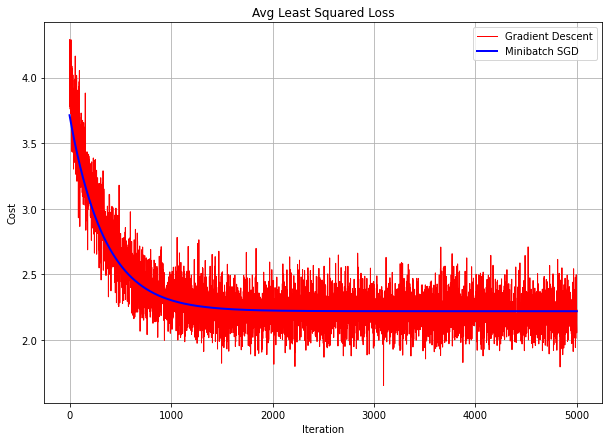

In [90]:
# create figure and define some figure decorations
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Avg Least Squared Loss')
plt.xlabel('Iteration')
plt.ylabel('Cost')

# plot loss values of minibatch_sgd
plt.plot(minibatch_sgd_loss, linewidth=1, color='r')

# plot loss values of gradient descent
plt.plot(gd_loss, linewidth=2, color='b')

# display legend and show the plot
plt.legend(["Gradient Descent", "Minibatch SGD"], loc ="upper right")
plt.show()

## (e) Does SGD do better or worse in terms of time performance on our data? Is there an optimal minibatch size that works best? Quantify and interpret your findings.



### Run both the algorithms with similar conditions (same learn_rate, init_w, and n_iter)

Iteration 1/5000 Loss 3.712573
Iteration 100/5000 Loss 3.338841
Iteration 200/5000 Loss 3.058970
Iteration 300/5000 Loss 2.849120
Iteration 400/5000 Loss 2.691683
Iteration 500/5000 Loss 2.573565
Iteration 600/5000 Loss 2.484945
Iteration 700/5000 Loss 2.418458
Iteration 800/5000 Loss 2.368575
Iteration 900/5000 Loss 2.331150
Iteration 1000/5000 Loss 2.303072
Iteration 1100/5000 Loss 2.282006
Iteration 1200/5000 Loss 2.266201
Iteration 1300/5000 Loss 2.254343
Iteration 1400/5000 Loss 2.245447
Iteration 1500/5000 Loss 2.238772
Iteration 1600/5000 Loss 2.233765
Iteration 1700/5000 Loss 2.230008
Iteration 1800/5000 Loss 2.227189
Iteration 1900/5000 Loss 2.225074
Iteration 2000/5000 Loss 2.223487
Iteration 2100/5000 Loss 2.222297
Iteration 2200/5000 Loss 2.221404
Iteration 2300/5000 Loss 2.220734
Iteration 2400/5000 Loss 2.220231
Iteration 2500/5000 Loss 2.219854
Iteration 2600/5000 Loss 2.219571
Iteration 2700/5000 Loss 2.219359
Iteration 2800/5000 Loss 2.219200
Iteration 2900/5000 Loss 2

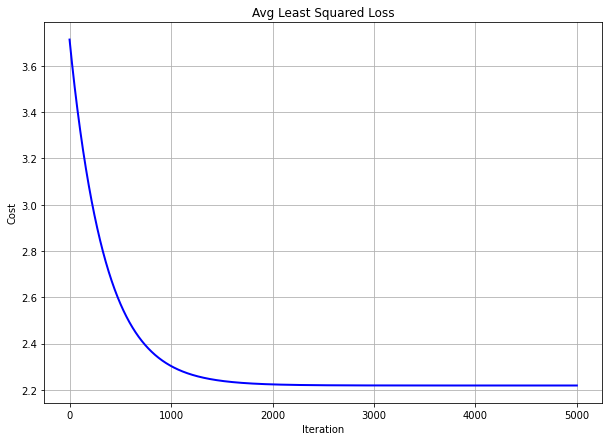

Gradient Descent: Optimal a = 0.29552705540877877 Optimal b = 2.022213963693806 Time:  2.40 seconds
Iteration 1/5000 Loss 4.487730
Iteration 100/5000 Loss 3.354825
Iteration 200/5000 Loss 3.333908
Iteration 300/5000 Loss 2.640777
Iteration 400/5000 Loss 2.814272
Iteration 500/5000 Loss 2.768112
Iteration 600/5000 Loss 2.976447
Iteration 700/5000 Loss 2.385265
Iteration 800/5000 Loss 2.689752
Iteration 900/5000 Loss 2.218771
Iteration 1000/5000 Loss 2.281783
Iteration 1100/5000 Loss 2.346630
Iteration 1200/5000 Loss 2.245374
Iteration 1300/5000 Loss 2.299199
Iteration 1400/5000 Loss 2.411990
Iteration 1500/5000 Loss 2.507982
Iteration 1600/5000 Loss 2.390134
Iteration 1700/5000 Loss 2.145431
Iteration 1800/5000 Loss 2.360525
Iteration 1900/5000 Loss 2.206385
Iteration 2000/5000 Loss 2.156336
Iteration 2100/5000 Loss 2.180640
Iteration 2200/5000 Loss 2.218924
Iteration 2300/5000 Loss 2.100116
Iteration 2400/5000 Loss 2.157958
Iteration 2500/5000 Loss 2.439422
Iteration 2600/5000 Loss 2.1

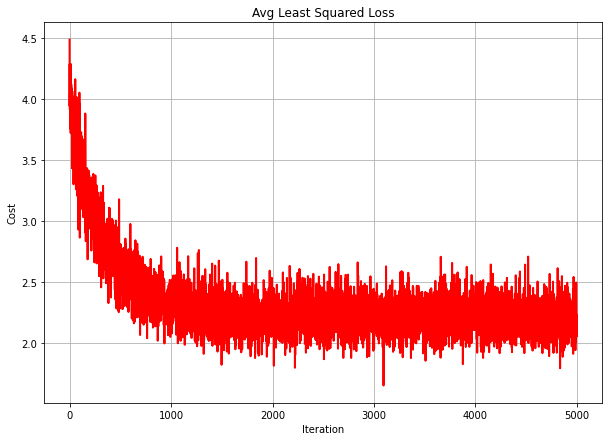

Mini-batch Stochastic Gradient Descent: Optimal a = 0.2954477897570114 Optimal b = 2.0252885972083647 Time:  2.05 seconds


In [91]:
# Initialize w (parameters a and b) randomly
np.random.seed(0)
init_w = np.random.rand(2)

# Run gradient descent
tic = time.time()
optimal_w, gd_loss = gradient_descent_linear_regression(X, y, gradient_linear_regression, init_w,
                                               learn_rate=0.001, n_iter=5000, tol=1e-06)
toc = time.time()
# Report the results
print('Gradient Descent: Optimal a =', optimal_w[1], 'Optimal b =', optimal_w[0],
     'Time: ', "{:.2f}".format(toc-tic), 'seconds')

# Run mini-batch SGD with same learning rate and same number of iterations

# define batch_size
batch_size = 512

# Run minibatch stochastic gradient descent with same learning rate and same
# number of iterations and same initial value of w
tic = time.time()
minibatch_sgd_optimal_w, minibatch_sgd_loss = minibatch_sgd(X, y, gradient_linear_regression,
                                                            init_w, batch_size=batch_size,
                                                            learn_rate=0.001, n_iter=5000,
                                                            tol=1e-06)
toc = time.time()

# Report the results
print('Mini-batch Stochastic Gradient Descent: Optimal a =', minibatch_sgd_optimal_w[1],
      'Optimal b =', minibatch_sgd_optimal_w[0], 'Time: ', "{:.2f}".format(toc-tic), 'seconds')

### Comparison of Time taken by Mini-batch SGD vs GD

<br>

In the above cell we ran both the algorithms using same **learn_rate**, **n_iter**, and same **init_w**. We can see that mini-batch stochastic gradient descent runs a bit faster compared to the gradient descent algorithm.

<br>

If we have $N$ data points having dimension $d$ then the gradient descent algorithm will take $O(kdN)$, stochastic gradient descent will take $O(kd)$ and mini-batch stochastic gradient descent will take $O(kdB)$ time where $B$ is the size of mini-batch and $k$ is the number of iterations for which out algorithm is run.

<br>

Therefore we can say that in terms of comparison of time performance:

<br>

Stochastic Gradient Descent < Mini-batch Stochastic Gradient Descent < Gradient Descent (written in the order of increasing time complexity).

## Find the optimal batch_size that gives the least error and also performs good in terms of time taken

Running on batch_size =  100
Iteration 1/5000 Loss 4.313004
Iteration 100/5000 Loss 3.113658
Iteration 200/5000 Loss 3.086366
Iteration 300/5000 Loss 2.582096
Iteration 400/5000 Loss 3.297910
Iteration 500/5000 Loss 3.002338
Iteration 600/5000 Loss 3.753851
Iteration 700/5000 Loss 1.820579
Iteration 800/5000 Loss 2.662609
Iteration 900/5000 Loss 2.070231
Iteration 1000/5000 Loss 1.855231
Iteration 1100/5000 Loss 2.202699
Iteration 1200/5000 Loss 2.236777
Iteration 1300/5000 Loss 2.794345
Iteration 1400/5000 Loss 3.120923
Iteration 1500/5000 Loss 2.534223
Iteration 1600/5000 Loss 2.884209
Iteration 1700/5000 Loss 1.997243
Iteration 1800/5000 Loss 1.742443
Iteration 1900/5000 Loss 2.970012
Iteration 2000/5000 Loss 1.948344
Iteration 2100/5000 Loss 2.156569
Iteration 2200/5000 Loss 2.503357
Iteration 2300/5000 Loss 2.146597
Iteration 2400/5000 Loss 2.015462
Iteration 2500/5000 Loss 2.638819
Iteration 2600/5000 Loss 1.634810
Iteration 2700/5000 Loss 2.152558
Iteration 2800/5000 Loss 2.3124

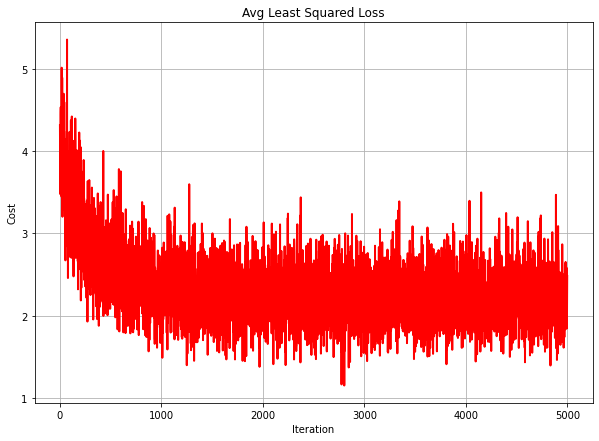

Mini-batch Stochastic Gradient Descent with batch_size =  100 : a = 0.3025673777654247 b = 2.018539046106316 Time=  1.81 seconds
Running on batch_size =  300
Iteration 1/5000 Loss 3.617853
Iteration 100/5000 Loss 3.535296
Iteration 200/5000 Loss 3.124973
Iteration 300/5000 Loss 2.478798
Iteration 400/5000 Loss 2.590144
Iteration 500/5000 Loss 2.819645
Iteration 600/5000 Loss 3.041236
Iteration 700/5000 Loss 2.321958
Iteration 800/5000 Loss 2.771277
Iteration 900/5000 Loss 2.281559
Iteration 1000/5000 Loss 2.247164
Iteration 1100/5000 Loss 2.378867
Iteration 1200/5000 Loss 2.448069
Iteration 1300/5000 Loss 2.452388
Iteration 1400/5000 Loss 2.715535
Iteration 1500/5000 Loss 2.738680
Iteration 1600/5000 Loss 2.449648
Iteration 1700/5000 Loss 2.224755
Iteration 1800/5000 Loss 1.947395
Iteration 1900/5000 Loss 2.375647
Iteration 2000/5000 Loss 2.161337
Iteration 2100/5000 Loss 2.275547
Iteration 2200/5000 Loss 2.234582
Iteration 2300/5000 Loss 1.995199
Iteration 2400/5000 Loss 2.194535
Iter

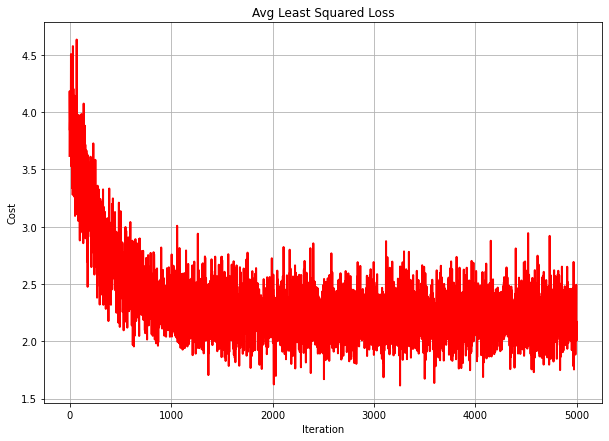

Mini-batch Stochastic Gradient Descent with batch_size =  300 : a = 0.29735207120192725 b = 2.0218733093500494 Time=  1.88 seconds
Running on batch_size =  500
Iteration 1/5000 Loss 3.764561
Iteration 100/5000 Loss 3.404673
Iteration 200/5000 Loss 3.358658
Iteration 300/5000 Loss 2.676777
Iteration 400/5000 Loss 2.845782
Iteration 500/5000 Loss 2.791858
Iteration 600/5000 Loss 2.973237
Iteration 700/5000 Loss 2.404310
Iteration 800/5000 Loss 2.690095
Iteration 900/5000 Loss 2.183544
Iteration 1000/5000 Loss 2.296904
Iteration 1100/5000 Loss 2.374750
Iteration 1200/5000 Loss 2.259293
Iteration 1300/5000 Loss 2.276706
Iteration 1400/5000 Loss 2.432697
Iteration 1500/5000 Loss 2.532786
Iteration 1600/5000 Loss 2.404910
Iteration 1700/5000 Loss 2.175145
Iteration 1800/5000 Loss 2.331091
Iteration 1900/5000 Loss 2.210708
Iteration 2000/5000 Loss 2.166251
Iteration 2100/5000 Loss 2.207288
Iteration 2200/5000 Loss 2.266471
Iteration 2300/5000 Loss 2.129141
Iteration 2400/5000 Loss 2.166736
It

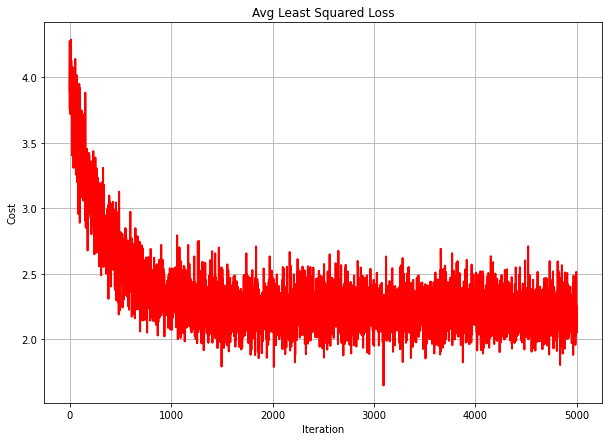

Mini-batch Stochastic Gradient Descent with batch_size =  500 : a = 0.2955088038645938 b = 2.0249666568894424 Time=  1.86 seconds
Running on batch_size =  700
Iteration 1/5000 Loss 3.986903
Iteration 100/5000 Loss 3.403696
Iteration 200/5000 Loss 3.324842
Iteration 300/5000 Loss 2.673768
Iteration 400/5000 Loss 2.812185
Iteration 500/5000 Loss 2.566011
Iteration 600/5000 Loss 2.901131
Iteration 700/5000 Loss 2.448401
Iteration 800/5000 Loss 2.533051
Iteration 900/5000 Loss 2.237403
Iteration 1000/5000 Loss 2.232053
Iteration 1100/5000 Loss 2.420171
Iteration 1200/5000 Loss 2.256924
Iteration 1300/5000 Loss 2.298243
Iteration 1400/5000 Loss 2.186078
Iteration 1500/5000 Loss 2.366624
Iteration 1600/5000 Loss 2.341609
Iteration 1700/5000 Loss 2.183677
Iteration 1800/5000 Loss 2.382380
Iteration 1900/5000 Loss 2.249687
Iteration 2000/5000 Loss 2.198230
Iteration 2100/5000 Loss 2.260135
Iteration 2200/5000 Loss 2.269819
Iteration 2300/5000 Loss 2.080005
Iteration 2400/5000 Loss 2.150878
Ite

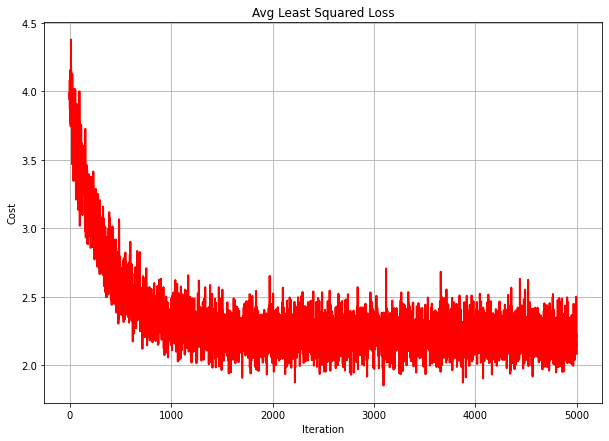

Mini-batch Stochastic Gradient Descent with batch_size =  700 : a = 0.29531166558062866 b = 2.02448561745369 Time=  1.90 seconds
Running on batch_size =  900
Iteration 1/5000 Loss 3.802636
Iteration 100/5000 Loss 3.389864
Iteration 200/5000 Loss 3.264188
Iteration 300/5000 Loss 2.802032
Iteration 400/5000 Loss 2.781002
Iteration 500/5000 Loss 2.587643
Iteration 600/5000 Loss 2.751843
Iteration 700/5000 Loss 2.462208
Iteration 800/5000 Loss 2.475305
Iteration 900/5000 Loss 2.215104
Iteration 1000/5000 Loss 2.197441
Iteration 1100/5000 Loss 2.421812
Iteration 1200/5000 Loss 2.235374
Iteration 1300/5000 Loss 2.276318
Iteration 1400/5000 Loss 2.161978
Iteration 1500/5000 Loss 2.258067
Iteration 1600/5000 Loss 2.316156
Iteration 1700/5000 Loss 2.087646
Iteration 1800/5000 Loss 2.364159
Iteration 1900/5000 Loss 2.297659
Iteration 2000/5000 Loss 2.232186
Iteration 2100/5000 Loss 2.208931
Iteration 2200/5000 Loss 2.280705
Iteration 2300/5000 Loss 2.126231
Iteration 2400/5000 Loss 2.196920
Iter

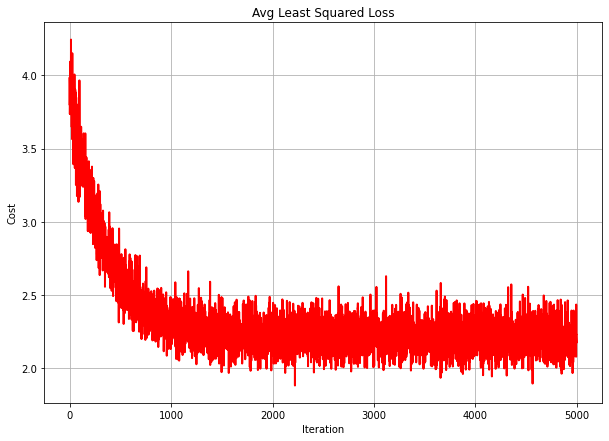

Mini-batch Stochastic Gradient Descent with batch_size =  900 : a = 0.2956709542703092 b = 2.023953013773441 Time=  2.15 seconds
Running on batch_size =  1100
Iteration 1/5000 Loss 3.814256
Iteration 100/5000 Loss 3.385057
Iteration 200/5000 Loss 3.300634
Iteration 300/5000 Loss 2.857057
Iteration 400/5000 Loss 2.793959
Iteration 500/5000 Loss 2.549586
Iteration 600/5000 Loss 2.794294
Iteration 700/5000 Loss 2.492361
Iteration 800/5000 Loss 2.429397
Iteration 900/5000 Loss 2.223716
Iteration 1000/5000 Loss 2.303029
Iteration 1100/5000 Loss 2.461755
Iteration 1200/5000 Loss 2.209493
Iteration 1300/5000 Loss 2.365963
Iteration 1400/5000 Loss 2.203616
Iteration 1500/5000 Loss 2.276877
Iteration 1600/5000 Loss 2.246710
Iteration 1700/5000 Loss 2.127333
Iteration 1800/5000 Loss 2.297808
Iteration 1900/5000 Loss 2.324778
Iteration 2000/5000 Loss 2.257076
Iteration 2100/5000 Loss 2.239646
Iteration 2200/5000 Loss 2.275003
Iteration 2300/5000 Loss 2.070246
Iteration 2400/5000 Loss 2.169046
Ite

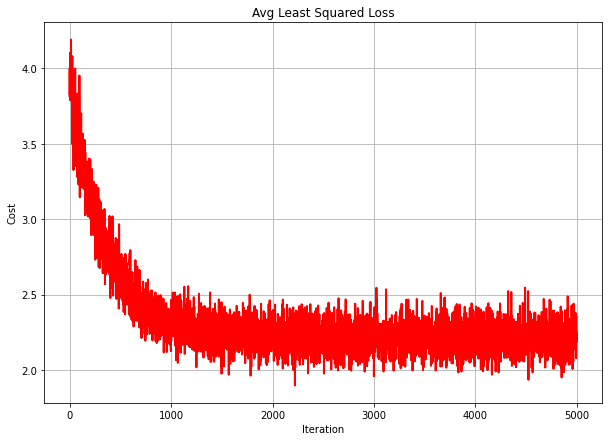

Mini-batch Stochastic Gradient Descent with batch_size =  1100 : a = 0.2957505263317086 b = 2.0237284106548055 Time=  2.12 seconds
Running on batch_size =  1300
Iteration 1/5000 Loss 3.798057
Iteration 100/5000 Loss 3.316668
Iteration 200/5000 Loss 3.270754
Iteration 300/5000 Loss 2.851581
Iteration 400/5000 Loss 2.831484
Iteration 500/5000 Loss 2.586781
Iteration 600/5000 Loss 2.778920
Iteration 700/5000 Loss 2.498978
Iteration 800/5000 Loss 2.367656
Iteration 900/5000 Loss 2.265496
Iteration 1000/5000 Loss 2.320841
Iteration 1100/5000 Loss 2.401015
Iteration 1200/5000 Loss 2.164246
Iteration 1300/5000 Loss 2.376030
Iteration 1400/5000 Loss 2.204897
Iteration 1500/5000 Loss 2.292114
Iteration 1600/5000 Loss 2.221524
Iteration 1700/5000 Loss 2.094849
Iteration 1800/5000 Loss 2.240201
Iteration 1900/5000 Loss 2.351352
Iteration 2000/5000 Loss 2.314958
Iteration 2100/5000 Loss 2.263983
Iteration 2200/5000 Loss 2.273934
Iteration 2300/5000 Loss 2.109669
Iteration 2400/5000 Loss 2.189095
I

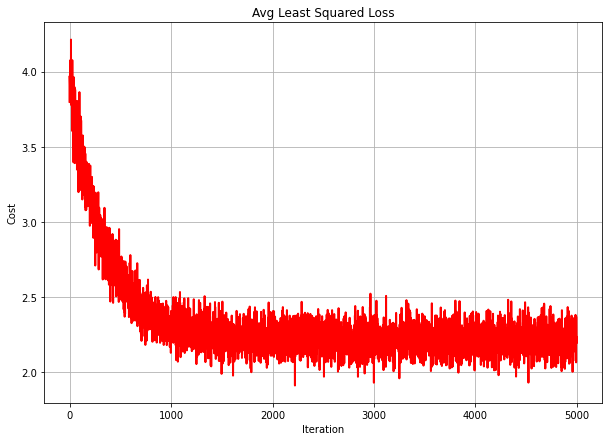

Mini-batch Stochastic Gradient Descent with batch_size =  1300 : a = 0.2957103593668721 b = 2.0235667116513314 Time=  2.15 seconds
Running on batch_size =  1500
Iteration 1/5000 Loss 3.892267
Iteration 100/5000 Loss 3.312483
Iteration 200/5000 Loss 3.229902
Iteration 300/5000 Loss 2.804043
Iteration 400/5000 Loss 2.901165
Iteration 500/5000 Loss 2.586615
Iteration 600/5000 Loss 2.705571
Iteration 700/5000 Loss 2.515382
Iteration 800/5000 Loss 2.357263
Iteration 900/5000 Loss 2.227986
Iteration 1000/5000 Loss 2.319229
Iteration 1100/5000 Loss 2.407119
Iteration 1200/5000 Loss 2.151127
Iteration 1300/5000 Loss 2.394379
Iteration 1400/5000 Loss 2.235384
Iteration 1500/5000 Loss 2.328560
Iteration 1600/5000 Loss 2.177168
Iteration 1700/5000 Loss 2.138656
Iteration 1800/5000 Loss 2.268615
Iteration 1900/5000 Loss 2.287301
Iteration 2000/5000 Loss 2.322809
Iteration 2100/5000 Loss 2.245231
Iteration 2200/5000 Loss 2.255747
Iteration 2300/5000 Loss 2.124056
Iteration 2400/5000 Loss 2.179141
I

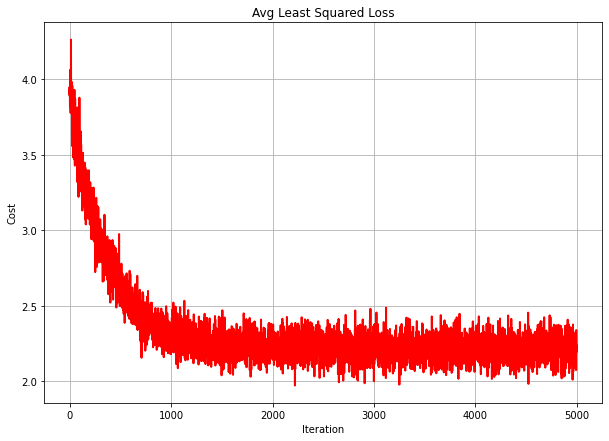

Mini-batch Stochastic Gradient Descent with batch_size =  1500 : a = 0.2961802594279409 b = 2.0237163437710866 Time=  2.06 seconds
Running on batch_size =  1700
Iteration 1/5000 Loss 3.965913
Iteration 100/5000 Loss 3.318700
Iteration 200/5000 Loss 3.145841
Iteration 300/5000 Loss 2.784560
Iteration 400/5000 Loss 2.916379
Iteration 500/5000 Loss 2.587456
Iteration 600/5000 Loss 2.704382
Iteration 700/5000 Loss 2.477014
Iteration 800/5000 Loss 2.404448
Iteration 900/5000 Loss 2.234281
Iteration 1000/5000 Loss 2.328714
Iteration 1100/5000 Loss 2.383207
Iteration 1200/5000 Loss 2.148066
Iteration 1300/5000 Loss 2.357177
Iteration 1400/5000 Loss 2.306839
Iteration 1500/5000 Loss 2.304466
Iteration 1600/5000 Loss 2.172814
Iteration 1700/5000 Loss 2.169696
Iteration 1800/5000 Loss 2.225063
Iteration 1900/5000 Loss 2.322770
Iteration 2000/5000 Loss 2.290107
Iteration 2100/5000 Loss 2.240020
Iteration 2200/5000 Loss 2.305281
Iteration 2300/5000 Loss 2.174376
Iteration 2400/5000 Loss 2.221250
I

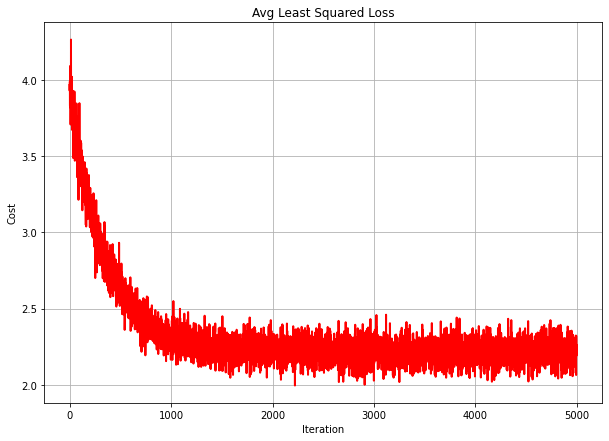

Mini-batch Stochastic Gradient Descent with batch_size =  1700 : a = 0.29628306170788826 b = 2.0240362615019962 Time=  2.21 seconds
Running on batch_size =  1900
Iteration 1/5000 Loss 4.016350
Iteration 100/5000 Loss 3.334178
Iteration 200/5000 Loss 3.172536
Iteration 300/5000 Loss 2.788738
Iteration 400/5000 Loss 2.867384
Iteration 500/5000 Loss 2.593225
Iteration 600/5000 Loss 2.688325
Iteration 700/5000 Loss 2.484329
Iteration 800/5000 Loss 2.382827
Iteration 900/5000 Loss 2.254642
Iteration 1000/5000 Loss 2.340193
Iteration 1100/5000 Loss 2.361379
Iteration 1200/5000 Loss 2.177325
Iteration 1300/5000 Loss 2.332369
Iteration 1400/5000 Loss 2.309737
Iteration 1500/5000 Loss 2.328235
Iteration 1600/5000 Loss 2.184572
Iteration 1700/5000 Loss 2.190851
Iteration 1800/5000 Loss 2.253539
Iteration 1900/5000 Loss 2.313699
Iteration 2000/5000 Loss 2.262069
Iteration 2100/5000 Loss 2.231254
Iteration 2200/5000 Loss 2.289022
Iteration 2300/5000 Loss 2.165713
Iteration 2400/5000 Loss 2.207953


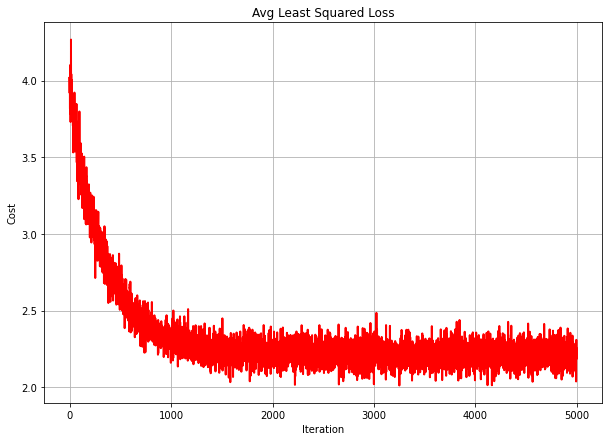

Mini-batch Stochastic Gradient Descent with batch_size =  1900 : a = 0.2965817618584857 b = 2.0238550383907445 Time=  2.10 seconds
Running on batch_size =  2100
Iteration 1/5000 Loss 4.016243
Iteration 100/5000 Loss 3.404766
Iteration 200/5000 Loss 3.126277
Iteration 300/5000 Loss 2.741343
Iteration 400/5000 Loss 2.849604
Iteration 500/5000 Loss 2.622533
Iteration 600/5000 Loss 2.645380
Iteration 700/5000 Loss 2.457704
Iteration 800/5000 Loss 2.382487
Iteration 900/5000 Loss 2.305914
Iteration 1000/5000 Loss 2.321790
Iteration 1100/5000 Loss 2.382233
Iteration 1200/5000 Loss 2.162582
Iteration 1300/5000 Loss 2.365919
Iteration 1400/5000 Loss 2.255060
Iteration 1500/5000 Loss 2.333332
Iteration 1600/5000 Loss 2.217969
Iteration 1700/5000 Loss 2.203538
Iteration 1800/5000 Loss 2.278869
Iteration 1900/5000 Loss 2.296239
Iteration 2000/5000 Loss 2.260713
Iteration 2100/5000 Loss 2.266066
Iteration 2200/5000 Loss 2.282239
Iteration 2300/5000 Loss 2.202084
Iteration 2400/5000 Loss 2.218403
I

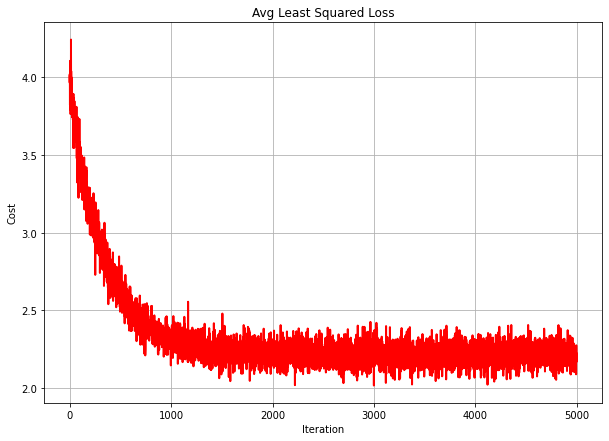

Mini-batch Stochastic Gradient Descent with batch_size =  2100 : a = 0.2960430090554138 b = 2.023043202362715 Time=  1.94 seconds
Running on batch_size =  2300
Iteration 1/5000 Loss 4.019807
Iteration 100/5000 Loss 3.471592
Iteration 200/5000 Loss 3.123398
Iteration 300/5000 Loss 2.751839
Iteration 400/5000 Loss 2.850060
Iteration 500/5000 Loss 2.606062
Iteration 600/5000 Loss 2.660657
Iteration 700/5000 Loss 2.476230
Iteration 800/5000 Loss 2.404844
Iteration 900/5000 Loss 2.270404
Iteration 1000/5000 Loss 2.334434
Iteration 1100/5000 Loss 2.356159
Iteration 1200/5000 Loss 2.190438
Iteration 1300/5000 Loss 2.358341
Iteration 1400/5000 Loss 2.253615
Iteration 1500/5000 Loss 2.343971
Iteration 1600/5000 Loss 2.189689
Iteration 1700/5000 Loss 2.234053
Iteration 1800/5000 Loss 2.274756
Iteration 1900/5000 Loss 2.287059
Iteration 2000/5000 Loss 2.233432
Iteration 2100/5000 Loss 2.297582
Iteration 2200/5000 Loss 2.276020
Iteration 2300/5000 Loss 2.209197
Iteration 2400/5000 Loss 2.228085
It

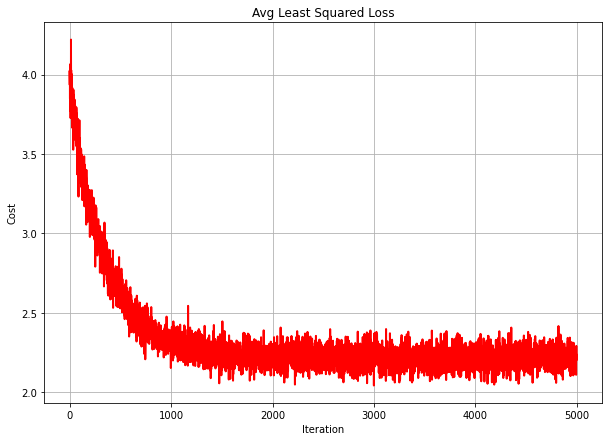

Mini-batch Stochastic Gradient Descent with batch_size =  2300 : a = 0.296075578304814 b = 2.022687004807882 Time=  2.04 seconds
Running on batch_size =  2500
Iteration 1/5000 Loss 4.068243
Iteration 100/5000 Loss 3.471601
Iteration 200/5000 Loss 3.116218
Iteration 300/5000 Loss 2.771076
Iteration 400/5000 Loss 2.860890
Iteration 500/5000 Loss 2.617701
Iteration 600/5000 Loss 2.659017
Iteration 700/5000 Loss 2.459956
Iteration 800/5000 Loss 2.376092
Iteration 900/5000 Loss 2.275455
Iteration 1000/5000 Loss 2.339526
Iteration 1100/5000 Loss 2.368892
Iteration 1200/5000 Loss 2.185092
Iteration 1300/5000 Loss 2.377255
Iteration 1400/5000 Loss 2.267906
Iteration 1500/5000 Loss 2.342686
Iteration 1600/5000 Loss 2.239834
Iteration 1700/5000 Loss 2.254888
Iteration 1800/5000 Loss 2.247850
Iteration 1900/5000 Loss 2.272298
Iteration 2000/5000 Loss 2.219460
Iteration 2100/5000 Loss 2.285892
Iteration 2200/5000 Loss 2.256965
Iteration 2300/5000 Loss 2.243845
Iteration 2400/5000 Loss 2.230792
Ite

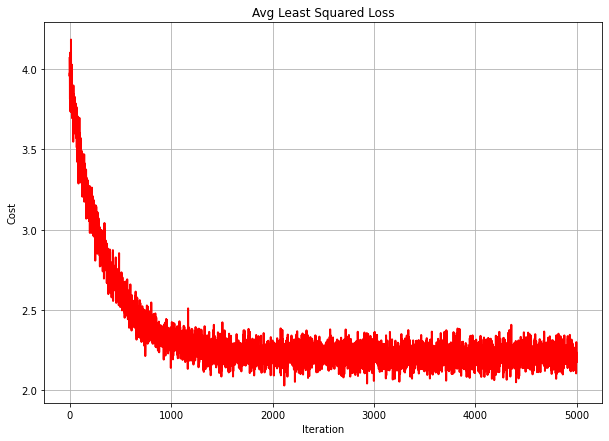

Mini-batch Stochastic Gradient Descent with batch_size =  2500 : a = 0.29630197492925797 b = 2.022336771329176 Time=  2.05 seconds
Running on batch_size =  2700
Iteration 1/5000 Loss 4.085840
Iteration 100/5000 Loss 3.456240
Iteration 200/5000 Loss 3.110969
Iteration 300/5000 Loss 2.785734
Iteration 400/5000 Loss 2.871682
Iteration 500/5000 Loss 2.649652
Iteration 600/5000 Loss 2.688234
Iteration 700/5000 Loss 2.462030
Iteration 800/5000 Loss 2.368259
Iteration 900/5000 Loss 2.280695
Iteration 1000/5000 Loss 2.317107
Iteration 1100/5000 Loss 2.361367
Iteration 1200/5000 Loss 2.171856
Iteration 1300/5000 Loss 2.366192
Iteration 1400/5000 Loss 2.275742
Iteration 1500/5000 Loss 2.349278
Iteration 1600/5000 Loss 2.214443
Iteration 1700/5000 Loss 2.238555
Iteration 1800/5000 Loss 2.276138
Iteration 1900/5000 Loss 2.242726
Iteration 2000/5000 Loss 2.215249
Iteration 2100/5000 Loss 2.255784
Iteration 2200/5000 Loss 2.264453
Iteration 2300/5000 Loss 2.250901
Iteration 2400/5000 Loss 2.246393
I

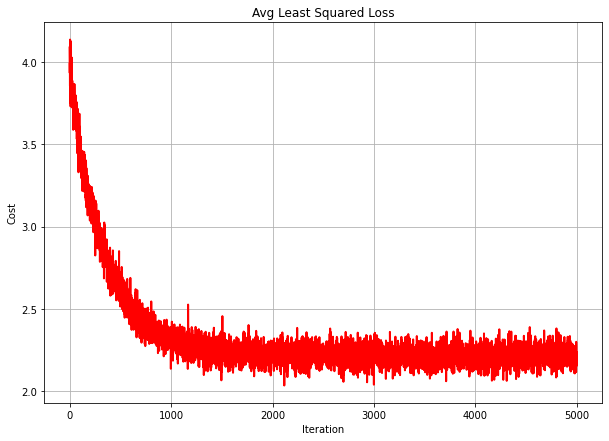

Mini-batch Stochastic Gradient Descent with batch_size =  2700 : a = 0.296285917684581 b = 2.022073493630936 Time=  2.13 seconds
Running on batch_size =  2900
Iteration 1/5000 Loss 4.090691
Iteration 100/5000 Loss 3.421904
Iteration 200/5000 Loss 3.142050
Iteration 300/5000 Loss 2.773230
Iteration 400/5000 Loss 2.914682
Iteration 500/5000 Loss 2.639467
Iteration 600/5000 Loss 2.668354
Iteration 700/5000 Loss 2.472206
Iteration 800/5000 Loss 2.387199
Iteration 900/5000 Loss 2.267405
Iteration 1000/5000 Loss 2.285623
Iteration 1100/5000 Loss 2.360765
Iteration 1200/5000 Loss 2.163883
Iteration 1300/5000 Loss 2.376184
Iteration 1400/5000 Loss 2.285118
Iteration 1500/5000 Loss 2.355703
Iteration 1600/5000 Loss 2.191949
Iteration 1700/5000 Loss 2.265728
Iteration 1800/5000 Loss 2.283020
Iteration 1900/5000 Loss 2.263671
Iteration 2000/5000 Loss 2.214648
Iteration 2100/5000 Loss 2.256860
Iteration 2200/5000 Loss 2.241458
Iteration 2300/5000 Loss 2.229972
Iteration 2400/5000 Loss 2.242476
Ite

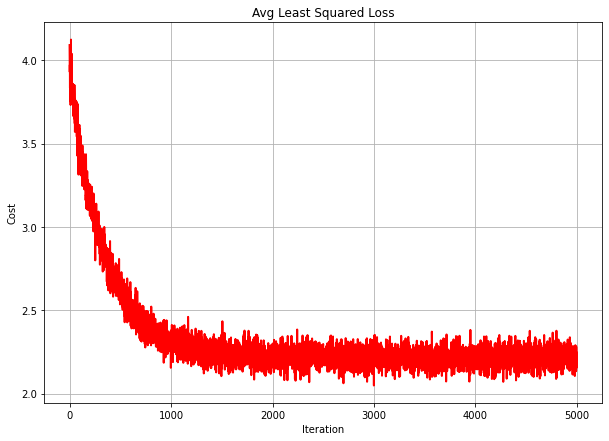

Mini-batch Stochastic Gradient Descent with batch_size =  2900 : a = 0.2958890004039138 b = 2.0218549350921773 Time=  2.22 seconds
Running on batch_size =  3100
Iteration 1/5000 Loss 4.078324
Iteration 100/5000 Loss 3.405815
Iteration 200/5000 Loss 3.116182
Iteration 300/5000 Loss 2.773944
Iteration 400/5000 Loss 2.891221
Iteration 500/5000 Loss 2.656400
Iteration 600/5000 Loss 2.664357
Iteration 700/5000 Loss 2.461940
Iteration 800/5000 Loss 2.366354
Iteration 900/5000 Loss 2.278441
Iteration 1000/5000 Loss 2.264414
Iteration 1100/5000 Loss 2.380357
Iteration 1200/5000 Loss 2.190667
Iteration 1300/5000 Loss 2.376544
Iteration 1400/5000 Loss 2.301002
Iteration 1500/5000 Loss 2.352995
Iteration 1600/5000 Loss 2.181503
Iteration 1700/5000 Loss 2.265983
Iteration 1800/5000 Loss 2.275221
Iteration 1900/5000 Loss 2.265237
Iteration 2000/5000 Loss 2.257929
Iteration 2100/5000 Loss 2.252078
Iteration 2200/5000 Loss 2.257499
Iteration 2300/5000 Loss 2.240903
Iteration 2400/5000 Loss 2.226433
I

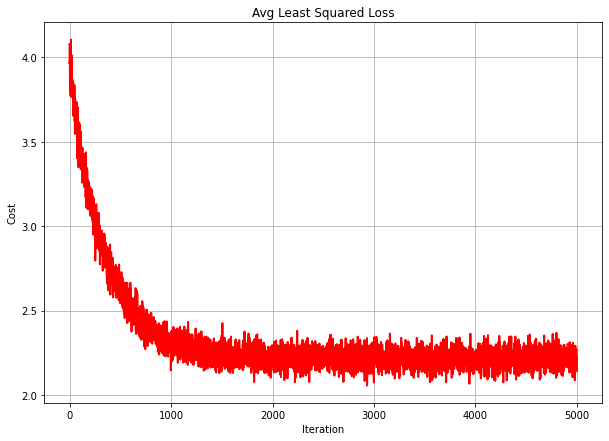

Mini-batch Stochastic Gradient Descent with batch_size =  3100 : a = 0.29601983439797847 b = 2.021712403937111 Time=  2.55 seconds
Running on batch_size =  3300
Iteration 1/5000 Loss 4.056377
Iteration 100/5000 Loss 3.392848
Iteration 200/5000 Loss 3.131199
Iteration 300/5000 Loss 2.816766
Iteration 400/5000 Loss 2.879587
Iteration 500/5000 Loss 2.642200
Iteration 600/5000 Loss 2.665323
Iteration 700/5000 Loss 2.473591
Iteration 800/5000 Loss 2.374389
Iteration 900/5000 Loss 2.285917
Iteration 1000/5000 Loss 2.273326
Iteration 1100/5000 Loss 2.369409
Iteration 1200/5000 Loss 2.192257
Iteration 1300/5000 Loss 2.379920
Iteration 1400/5000 Loss 2.296296
Iteration 1500/5000 Loss 2.347935
Iteration 1600/5000 Loss 2.190914
Iteration 1700/5000 Loss 2.252435
Iteration 1800/5000 Loss 2.255644
Iteration 1900/5000 Loss 2.268325
Iteration 2000/5000 Loss 2.227985
Iteration 2100/5000 Loss 2.246737
Iteration 2200/5000 Loss 2.249907
Iteration 2300/5000 Loss 2.242015
Iteration 2400/5000 Loss 2.202022
I

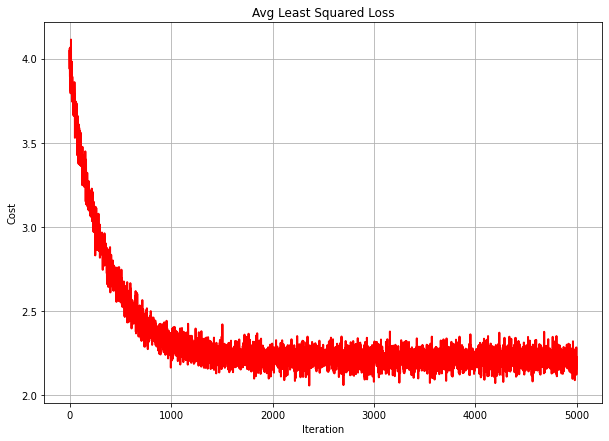

Mini-batch Stochastic Gradient Descent with batch_size =  3300 : a = 0.2960853477307016 b = 2.0213262068488818 Time=  2.58 seconds
Running on batch_size =  3500
Iteration 1/5000 Loss 4.067165
Iteration 100/5000 Loss 3.436973
Iteration 200/5000 Loss 3.151101
Iteration 300/5000 Loss 2.811521
Iteration 400/5000 Loss 2.860182
Iteration 500/5000 Loss 2.652061
Iteration 600/5000 Loss 2.676195
Iteration 700/5000 Loss 2.476559
Iteration 800/5000 Loss 2.387930
Iteration 900/5000 Loss 2.305447
Iteration 1000/5000 Loss 2.272498
Iteration 1100/5000 Loss 2.366124
Iteration 1200/5000 Loss 2.189904
Iteration 1300/5000 Loss 2.371762
Iteration 1400/5000 Loss 2.283979
Iteration 1500/5000 Loss 2.344451
Iteration 1600/5000 Loss 2.198105
Iteration 1700/5000 Loss 2.248554
Iteration 1800/5000 Loss 2.270094
Iteration 1900/5000 Loss 2.249261
Iteration 2000/5000 Loss 2.229191
Iteration 2100/5000 Loss 2.262042
Iteration 2200/5000 Loss 2.244975
Iteration 2300/5000 Loss 2.267625
Iteration 2400/5000 Loss 2.186137
I

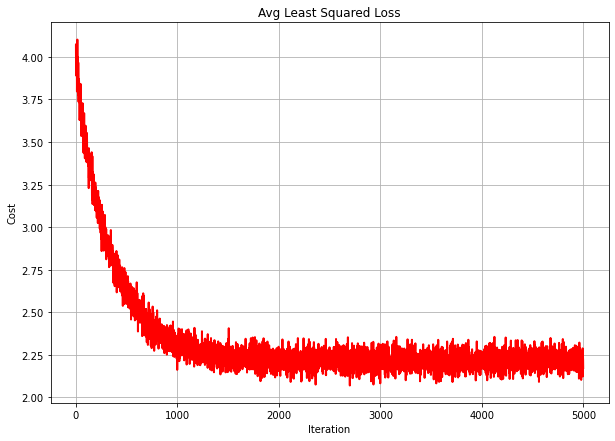

Mini-batch Stochastic Gradient Descent with batch_size =  3500 : a = 0.2960854836475428 b = 2.021371984875238 Time=  2.37 seconds
Running on batch_size =  3700
Iteration 1/5000 Loss 4.069635
Iteration 100/5000 Loss 3.442688
Iteration 200/5000 Loss 3.163771
Iteration 300/5000 Loss 2.821972
Iteration 400/5000 Loss 2.847608
Iteration 500/5000 Loss 2.668061
Iteration 600/5000 Loss 2.680650
Iteration 700/5000 Loss 2.479822
Iteration 800/5000 Loss 2.373579
Iteration 900/5000 Loss 2.307671
Iteration 1000/5000 Loss 2.314472
Iteration 1100/5000 Loss 2.377200
Iteration 1200/5000 Loss 2.206131
Iteration 1300/5000 Loss 2.395282
Iteration 1400/5000 Loss 2.269180
Iteration 1500/5000 Loss 2.331372
Iteration 1600/5000 Loss 2.207461
Iteration 1700/5000 Loss 2.250559
Iteration 1800/5000 Loss 2.244931
Iteration 1900/5000 Loss 2.257650
Iteration 2000/5000 Loss 2.220521
Iteration 2100/5000 Loss 2.254697
Iteration 2200/5000 Loss 2.241339
Iteration 2300/5000 Loss 2.269794
Iteration 2400/5000 Loss 2.195282
It

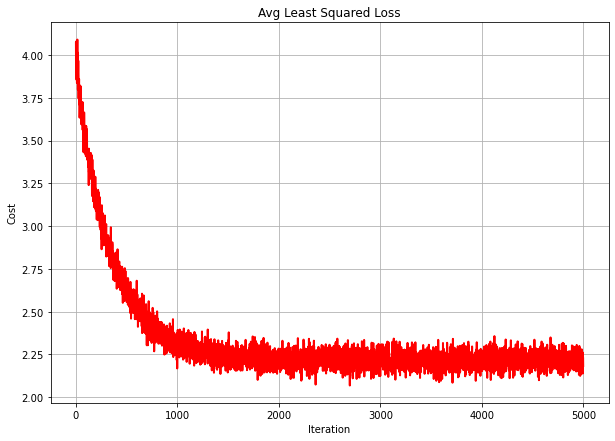

Mini-batch Stochastic Gradient Descent with batch_size =  3700 : a = 0.29633480633546444 b = 2.021293559061671 Time=  2.39 seconds
Running on batch_size =  3900
Iteration 1/5000 Loss 4.061478
Iteration 100/5000 Loss 3.463691
Iteration 200/5000 Loss 3.154424
Iteration 300/5000 Loss 2.819935
Iteration 400/5000 Loss 2.827136
Iteration 500/5000 Loss 2.655803
Iteration 600/5000 Loss 2.693181
Iteration 700/5000 Loss 2.474501
Iteration 800/5000 Loss 2.365518
Iteration 900/5000 Loss 2.316024
Iteration 1000/5000 Loss 2.305512
Iteration 1100/5000 Loss 2.385133
Iteration 1200/5000 Loss 2.196045
Iteration 1300/5000 Loss 2.384712
Iteration 1400/5000 Loss 2.260664
Iteration 1500/5000 Loss 2.341936
Iteration 1600/5000 Loss 2.200498
Iteration 1700/5000 Loss 2.233833
Iteration 1800/5000 Loss 2.240814
Iteration 1900/5000 Loss 2.274042
Iteration 2000/5000 Loss 2.223744
Iteration 2100/5000 Loss 2.236612
Iteration 2200/5000 Loss 2.236203
Iteration 2300/5000 Loss 2.269244
Iteration 2400/5000 Loss 2.184855
I

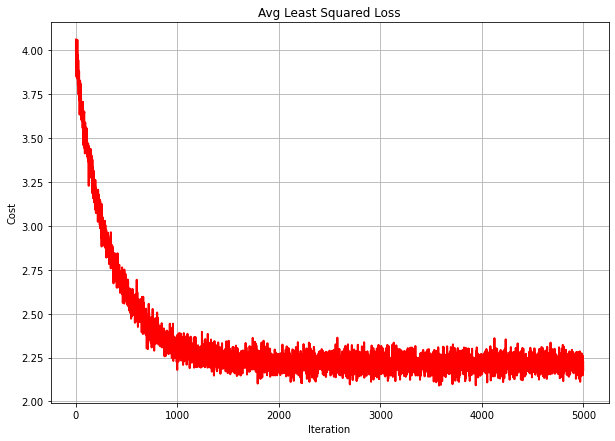

Mini-batch Stochastic Gradient Descent with batch_size =  3900 : a = 0.29637889000970763 b = 2.021307918484624 Time=  2.67 seconds
Running on batch_size =  4100
Iteration 1/5000 Loss 4.081421
Iteration 100/5000 Loss 3.445842
Iteration 200/5000 Loss 3.171718
Iteration 300/5000 Loss 2.838542
Iteration 400/5000 Loss 2.802814
Iteration 500/5000 Loss 2.667421
Iteration 600/5000 Loss 2.712429
Iteration 700/5000 Loss 2.475447
Iteration 800/5000 Loss 2.346308
Iteration 900/5000 Loss 2.328186
Iteration 1000/5000 Loss 2.310422
Iteration 1100/5000 Loss 2.364552
Iteration 1200/5000 Loss 2.199623
Iteration 1300/5000 Loss 2.370002
Iteration 1400/5000 Loss 2.238730
Iteration 1500/5000 Loss 2.335658
Iteration 1600/5000 Loss 2.215735
Iteration 1700/5000 Loss 2.218490
Iteration 1800/5000 Loss 2.216816
Iteration 1900/5000 Loss 2.281899
Iteration 2000/5000 Loss 2.213071
Iteration 2100/5000 Loss 2.240326
Iteration 2200/5000 Loss 2.228419
Iteration 2300/5000 Loss 2.258793
Iteration 2400/5000 Loss 2.186303
I

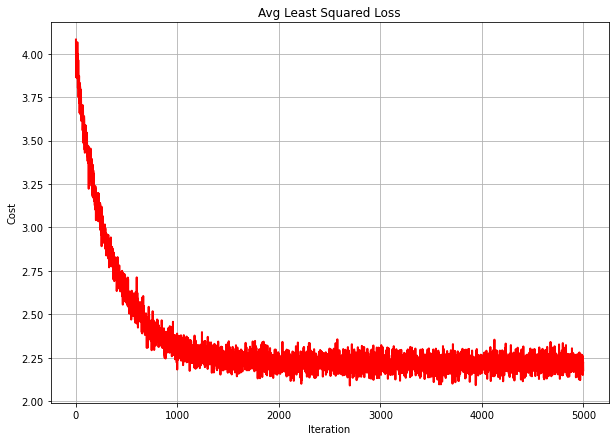

Mini-batch Stochastic Gradient Descent with batch_size =  4100 : a = 0.2964621593549047 b = 2.0215507311255903 Time=  2.71 seconds
Running on batch_size =  4300
Iteration 1/5000 Loss 4.083845
Iteration 100/5000 Loss 3.445140
Iteration 200/5000 Loss 3.171594
Iteration 300/5000 Loss 2.819565
Iteration 400/5000 Loss 2.792926
Iteration 500/5000 Loss 2.669526
Iteration 600/5000 Loss 2.693220
Iteration 700/5000 Loss 2.463580
Iteration 800/5000 Loss 2.337073
Iteration 900/5000 Loss 2.339744
Iteration 1000/5000 Loss 2.295039
Iteration 1100/5000 Loss 2.362746
Iteration 1200/5000 Loss 2.197932
Iteration 1300/5000 Loss 2.346878
Iteration 1400/5000 Loss 2.251409
Iteration 1500/5000 Loss 2.354021
Iteration 1600/5000 Loss 2.209819
Iteration 1700/5000 Loss 2.217044
Iteration 1800/5000 Loss 2.196211
Iteration 1900/5000 Loss 2.272092
Iteration 2000/5000 Loss 2.217320
Iteration 2100/5000 Loss 2.236887
Iteration 2200/5000 Loss 2.224686
Iteration 2300/5000 Loss 2.265118
Iteration 2400/5000 Loss 2.179232
I

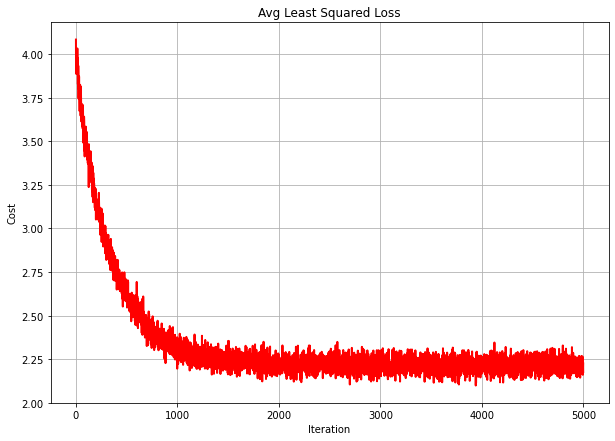

Mini-batch Stochastic Gradient Descent with batch_size =  4300 : a = 0.2963567675686542 b = 2.0215029463898264 Time=  2.66 seconds
Running on batch_size =  4500
Iteration 1/5000 Loss 4.127271
Iteration 100/5000 Loss 3.445038
Iteration 200/5000 Loss 3.172738
Iteration 300/5000 Loss 2.826634
Iteration 400/5000 Loss 2.781359
Iteration 500/5000 Loss 2.674479
Iteration 600/5000 Loss 2.680596
Iteration 700/5000 Loss 2.459479
Iteration 800/5000 Loss 2.340305
Iteration 900/5000 Loss 2.342808
Iteration 1000/5000 Loss 2.306669
Iteration 1100/5000 Loss 2.360665
Iteration 1200/5000 Loss 2.209811
Iteration 1300/5000 Loss 2.327294
Iteration 1400/5000 Loss 2.249615
Iteration 1500/5000 Loss 2.345460
Iteration 1600/5000 Loss 2.229084
Iteration 1700/5000 Loss 2.207434
Iteration 1800/5000 Loss 2.193783
Iteration 1900/5000 Loss 2.275099
Iteration 2000/5000 Loss 2.223856
Iteration 2100/5000 Loss 2.247436
Iteration 2200/5000 Loss 2.231511
Iteration 2300/5000 Loss 2.253656
Iteration 2400/5000 Loss 2.185832
I

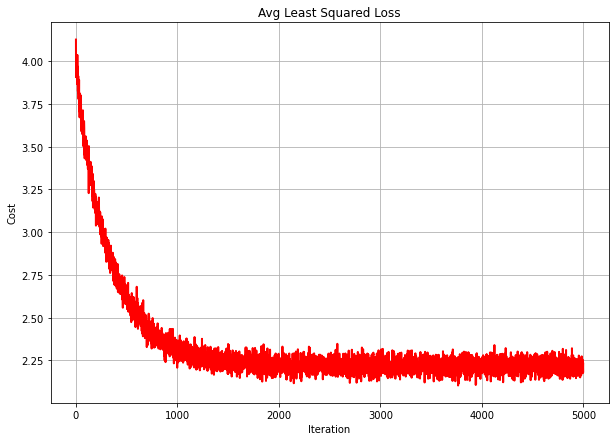

Mini-batch Stochastic Gradient Descent with batch_size =  4500 : a = 0.29611189712878294 b = 2.0215888796598254 Time=  3.35 seconds
Running on batch_size =  4700
Iteration 1/5000 Loss 4.136336
Iteration 100/5000 Loss 3.457891
Iteration 200/5000 Loss 3.180377
Iteration 300/5000 Loss 2.834285
Iteration 400/5000 Loss 2.767151
Iteration 500/5000 Loss 2.693406
Iteration 600/5000 Loss 2.665355
Iteration 700/5000 Loss 2.463952
Iteration 800/5000 Loss 2.349196
Iteration 900/5000 Loss 2.347929
Iteration 1000/5000 Loss 2.308557
Iteration 1100/5000 Loss 2.359260
Iteration 1200/5000 Loss 2.216859
Iteration 1300/5000 Loss 2.307515
Iteration 1400/5000 Loss 2.240390
Iteration 1500/5000 Loss 2.324448
Iteration 1600/5000 Loss 2.233337
Iteration 1700/5000 Loss 2.189930
Iteration 1800/5000 Loss 2.190816
Iteration 1900/5000 Loss 2.274085
Iteration 2000/5000 Loss 2.216031
Iteration 2100/5000 Loss 2.233349
Iteration 2200/5000 Loss 2.238515
Iteration 2300/5000 Loss 2.246558
Iteration 2400/5000 Loss 2.189007


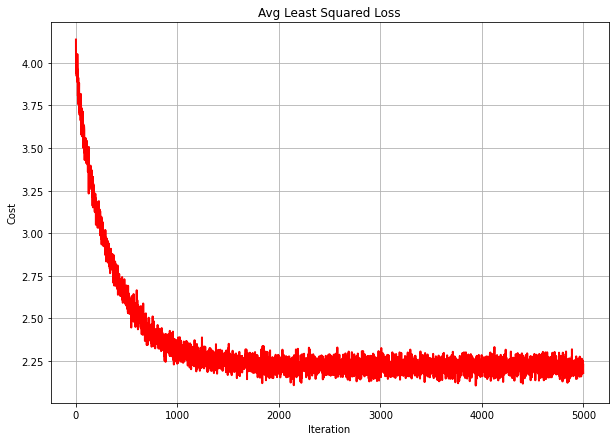

Mini-batch Stochastic Gradient Descent with batch_size =  4700 : a = 0.29583080874112416 b = 2.0217074991456627 Time=  6.30 seconds
Running on batch_size =  4900
Iteration 1/5000 Loss 4.118928
Iteration 100/5000 Loss 3.455069
Iteration 200/5000 Loss 3.191951
Iteration 300/5000 Loss 2.875081
Iteration 400/5000 Loss 2.762717
Iteration 500/5000 Loss 2.693414
Iteration 600/5000 Loss 2.627433
Iteration 700/5000 Loss 2.463507
Iteration 800/5000 Loss 2.344598
Iteration 900/5000 Loss 2.345747
Iteration 1000/5000 Loss 2.317903
Iteration 1100/5000 Loss 2.347371
Iteration 1200/5000 Loss 2.212676
Iteration 1300/5000 Loss 2.288768
Iteration 1400/5000 Loss 2.226523
Iteration 1500/5000 Loss 2.318710
Iteration 1600/5000 Loss 2.234736
Iteration 1700/5000 Loss 2.182925
Iteration 1800/5000 Loss 2.189507
Iteration 1900/5000 Loss 2.254943
Iteration 2000/5000 Loss 2.218543
Iteration 2100/5000 Loss 2.238447
Iteration 2200/5000 Loss 2.255212
Iteration 2300/5000 Loss 2.241112
Iteration 2400/5000 Loss 2.178884


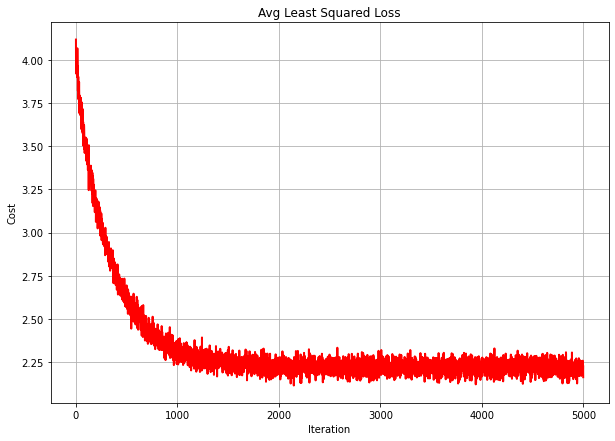

Mini-batch Stochastic Gradient Descent with batch_size =  4900 : a = 0.29567507433706713 b = 2.021793783267229 Time=  5.81 seconds


In [92]:
# create empty lists to store the time taken and loss for different batch_sizes
time_taken = list()
final_loss = list()

# Run for various batch_sizes
for i in range(100, 5000, 200):
    
    # Initialize w (parameters a and b) randomly
    np.random.seed(0)
    init_w = np.random.rand(2)
    
    # Run on batch sizes that are power of 2
    batch_size = i
    
    print('Running on batch_size = ', batch_size)
    
    # Run minibatch stochastic gradient descent
    tic = time.time()
    minibatch_sgd_optimal_w, minibatch_sgd_loss = minibatch_sgd(X, y, gradient_linear_regression,
                                                                init_w, batch_size=batch_size,
                                                                learn_rate=0.001, n_iter=5000,
                                                                tol=1e-06)
    toc = time.time()

    # append the time taken on this run to the list
    time_taken.append(toc-tic)
    
    # append the loss in the last iteration to the list
    final_loss.append(minibatch_sgd_loss[-1])
    
    # Report the results
    print('Mini-batch Stochastic Gradient Descent with batch_size = ', batch_size, ': a =', minibatch_sgd_optimal_w[1],
          'b =', minibatch_sgd_optimal_w[0], 'Time= ', "{:.2f}".format(toc-tic), 'seconds')

# Plot the time taken and final loss of various batch_sizes recorded above

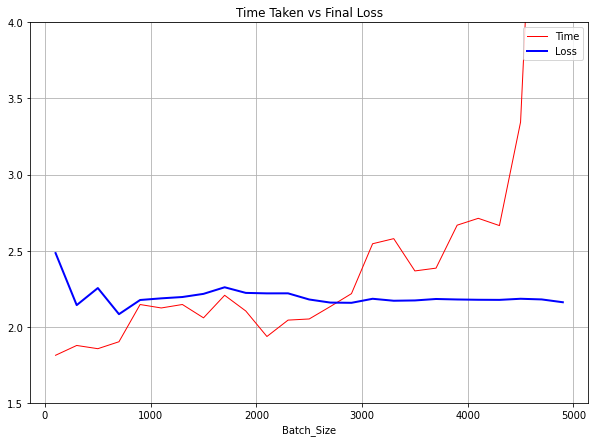

In [103]:
# create figure and define some figure decorations
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Time Taken vs Final Loss')
plt.xlabel('Batch_Size')
plt.ylabel('')
plt.ylim(1.5, 4)

# these are the various batch_sizes we tried
batch_sizes = [i for i in range(100, 5000, 200)]

# plot time values
plt.plot(batch_sizes, time_taken, linewidth=1, color='r')

# plot loss values
plt.plot(batch_sizes, final_loss, linewidth=2, color='b')

# display legend and show the plot
plt.legend(["Time", "Loss"], loc ="upper right")
plt.show()

We can see that near the batch size of 1000 to 2000 the time taken is less and the loss values are also suffiently low. This is the optimal range of batch_sizes.

In [109]:
minindex = final_loss.index(min(final_loss))
print('Optimal Batch Size that gives least final loss = ', batch_sizes[minindex])

Optimal Batch Size that gives least final loss =  700


------------------------------------------------------------------------------------------ End of Question 1 --------------------------------------------------------------------------------------------

# Question 2. Consider the following Bayesian Network

In [110]:
from IPython.display import Image
Image(url= "./image.jpg", width=1000, height=800)

### (i) Calculate the probability that someone has both cold and a fever.

<br>

&emsp;&emsp; Let us denote, <br>
&emsp;&emsp; $P(F) =$ Having a fever, <br>
&emsp;&emsp; $P(C) =$ Having a cold, and <br>
&emsp;&emsp; $P(CF) =$ Having both cold and a fever

<br>

&emsp;&emsp; Based on the Bayesian network given we can see that there is a directed edge from node 'Cold' to node 'Fever'.
Such a directed edge denotes a direct dependence between the events.

<br>

&emsp;&emsp; For our question, we have to find P(CF) i.e. the probability that someone has both cold and a fever. Since node 'Fever' depends on node 'Cold', we can calculate the required probability as follows: 

$$
\begin{align}
P(CF) &= P(C)P(F|C) \\
P(CF) &= 0.02 * 0.307 \\
P(CF) &= 0.00614
\end{align}
$$

### (ii) Calculate the probability that someone who has a cough has a cold.

&emsp;&emsp; Let us denote, <br>
&emsp;&emsp; $P(S) =$ The person smokes, <br>
&emsp;&emsp; $P(C) =$ Having a cold, <br>
&emsp;&emsp; $P(C_1) =$ Having a cough, and <br>
&emsp;&emsp; $P(LD) =$ Having a lung disease

<br>

&emsp;&emsp; The question asks the probability that someone who has a cough has a cold. To calculate this probability we need to observe the following 4 nodes in the given Bayesian network: <br>

&emsp;&emsp; 1. 'Cold' <br>
&emsp;&emsp; 2. 'Smokes' <br>
&emsp;&emsp; 3. 'Lung Disease' (dependent on 'Smokes) <br>
&emsp;&emsp; 4. 'Cough' (dependent on 'Lung Disease' and also dependent on 'Cold')

<br>

&emsp;&emsp; We can calculate $P(C|C_1)$ the reverse probability that someone who has a cough has a cold by using the equation from Baye's theorem as follows:

$$ P(C|C_1) = \frac {P(C_1|C) * P(C)}{P(C_1)} $$

<br>

&emsp;&emsp; To calculate this, we shall first find out each individual term in the above equation.

&emsp;&emsp; 1. $P(C) = 0.02$

&emsp;&emsp; 2. $P(LD)$

&emsp;&emsp; Since there is a directed edge from node 'Smokes' to the nodes 'Lung Disease', the event 'Lung Disease' is dependent upon the event 'Smokes'. Thus, the probability of having a lung disease can be calculated as follows:

$$
\begin{align}
P(LD) &= P(S)(LD|S) + P(S^c)P(LD|S^c) \\
P(LD) &= 0.2 * 0.1009 + 0.8 * 0.001 \\
P(LD) &= 0.02098
\end{align}
$$

&emsp;&emsp;Also, $P(LD^c) = 1 - P(LD) = 1 - 0.02098 = 0.97902$

&emsp;&emsp; 3. $P(C_1|C)$

&emsp;&emsp; Since the event 'Cough' is dependent upon whether the person has lung disease or not, we can calculate $P(C_1|C)$ as follows:

$$
\begin{align}
P(C_1|C) &= P(C_1|C, LD)P(LD) + P(C_1|C, LD^c)P(LD^c) \\
P(C_1|C) &= 0.7525 * 0.02098 + 0.505 * 0.97902 \\
P(C_1|C) &= 0.51019255
\end{align}
$$

&emsp;&emsp; 4. $P(C_1)$

&emsp;&emsp; The event 'Cough' is dependent upon the event 'Lung Disease' and the event 'Cold', we can calculate $P(C_1)$ as follows:

$$
\begin{align}
P(C_1) &= P(C_1|C, LD)P(C)P(LD) + P(C_1|C^c, LD)P(C^c)P(LD) + P(C_1|C, LD^c)P(C)P(LD^c) + P(C_1|C^c, LD^C)P(C^c)P(LD^c) \\
P(C_1) &= (0.7525 * 0.02098 * 0.02) + (0.505 * 0.02098 * 0.98) + (0.505 * 0.97902 * 0.02) + (0.01 * 0.97902 * 0.98) \\
P(C_1) &= 0.000315749 + 0.010383002 + 0.009888102 + 0.009594396 \\
P(C_1) &= 0.030181249
\end{align}
$$

&emsp;&emsp; Now, we will put these calculated values in the equation for Baye's theorem and calculate the desired answer.

$$
\begin{align}
P(C|C_1) &= \frac {P(C_1|C) * P(C)}{P(C_1)} \\
P(C|C_1) &= \frac {0.51019255*0.02}{0.030181249} \\
P(C|C_1) &= 0.338085776
\end{align}
$$

------------------------------------------------------------------------------------------ End of Question 2 --------------------------------------------------------------------------------------------

# Question 3. Derive the MLE for the parameters of a k-sided multinomial distribution.

### Basic Ideas:

1. Binomial Distribution: 

    - There are $n$ trials
    - Each trial can result in success (with $probability = p$) or failure (with $probability = 1-p$)
    - These outcomes are mutually exclusive and exhaustive. Therefore, $p(success) + p(failure) = p + (1-p) = 1$

Let us suppose the random variable $X$ represents the number of successes in $n$ trials, then the probability mass function for the binomial distribution is $$ f(k, n, p) = Pr(X=k) = \binom{n}{k} p^kq^{n-k}$$

2. k-sided Multinomial Distribution:

    - There are $n$ trials
    - Each trial can result in any of the $k$ possible outcomes, having probabilities $p_1, p_2,..., p_k$
    - These outcomes are mutually exclusive and exhaustive. Therefore, $ \sum_{i=1}^{k} p_i = 1$

Let us suppose the random variable $X_i$ denotes the number of occurances of event $i$ then the probability mass function for a k-sided multinomial distribution is $$ f(x_1, x_2, ..., x_k; n, p_1, p_2, ..., p_k) = Pr(X_1=x_1, X_2=x_2, ..., X_k = x_k) = \frac{n!}{x_1!x_2!...x_k!} p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$

<br>

### Finding MLE for The k-sided Multinomial Distribution:

<br>

To find the maximum likelihood estimator of parameters, we perform the following steps:

1. Find the likelihood
2. Calculate the log of likelihood, call it log-likelihood.
3. Maximize the log-likelihood by using the concepts of maxima-minima

<br>

**NOTE:** Taking the log of likelihood doesn't affect the maxima since log is a monotonic function (strictly increasing).

<br>

**NOTE:** The problem of maximizing the log-likelihood is a constrained optimization problem in our scenario. This constaint is $ \sum_{i=1}^{k} p_i = 1$, which can be written as $C(p_1, p_2, ..., p_k): 1 - \sum_{i=1}^{k} p_i = 0$

<br>

Let's perform the above steps to find the MLE:

1. Likelihood
$$L(p_1, p_2, ..., p_k) = \frac{n!}{x_1!x_2!...x_k!} p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$

<br>

2. Log-Likelihood,
$$
\begin{align}
LL(p_1, p_2, ..., p_k) &= log(n!) - log(x_1!x_2!..x_k!) + log(p_1^{x_1}p_2^{x_2}...p_k^{x_k}) \\
&= log(n!) - \sum_{i=1}^{k} log(x_i!) + \sum_{i=1}^{k} x_i log(p_i)
\end{align}
$$

<br>

3. Maximize the constained problem using the concept of lagrange multiplier.

<br>

The constrained maximization equation can be written as:

$$
CLL(p_1, p_2, ..., p_k) = LL(p_1, p_2, ..., p_k) + \alpha C(p_1, p_2, ..., p_k)
$$

where $\alpha$ is the lagrange multiplier.

<br>

To maximize the above function, we will calculate the derivative w.r.t. $p_i$ equal to 0:

$$
\begin{align}
\frac {\partial \{CLL(p_1, p_2, ..., p_k)\}} {\partial p_i} &= 0 \\
\frac {\partial \{LL(p_1, p_2, ..., p_k)\}} {\partial p_i} + \frac {\partial \{\alpha C(p_1, p_2, ..., p_k)\}} {\partial p_i} &= 0 \\
\frac {\partial \{log(n!) - \sum_{i=1}^{k} log(x_i!) + \sum_{i=1}^{k} x_i log(p_i)\}} {\partial p_i} + \frac {\partial \{\alpha (1 - \sum_{i=1}^{k} p_i) \}} {\partial p_i} &= 0 \\
\frac {\partial \{\sum_{i=1}^{k} x_i log(p_i)\}} {\partial p_i} - \alpha \frac {\partial \{\sum_{i=1}^{k} p_i\}} {\partial p_i} &= 0 \\
\frac {x_i} {p_i} - \alpha &= 0 \\
p_i &= \frac {x_i} {\alpha}
\end{align}
$$

<br>

Now, we just need to find the value of lagrange multiplier $\alpha$ and put the value into above equation to get $p_i$.

Since, $p_i = \frac {x_i} {\alpha}$, we can write $\sum_{i=1}^k p_i = \frac {\sum_{i=1}^k {x_i}} {\alpha}$.

Also, we know that $\sum_{i=1}^k p_i = 1$ and $\sum_{i=1}^k x_i = n$, therefore we can write $1 = \frac{n}{\alpha}$ which gives us $\alpha = n$.

Putting the value of lagrange multiplier in the equation $p_i = \frac {x_i} {\alpha}$, we get the answer $p_i = \frac{X_i}{n}$

------------------------------------------------------------------------------------------ End of Question 3 --------------------------------------------------------------------------------------------